# HW 4

## Q1

1. What is the difference between regression and classification?
Regression predicts continuous numerical values (like price or temperature), while classification predicts distinct categories or labels (like cat/dog).
2. What is a confusion table? What does it help us understand about a model's performance?
A grid showing true positives, true negatives, false positives, and false negatives that reveals where a classification model makes mistakes, not just overall accuracy.
3. What does the SSE quantify about a particular model?
SSE measures the total prediction error by summing squared differences between predicted and actual values. A lower SSE means better fit to the data.
4. What are overfitting and underfitting?
Underfitting is when a model is too simple and performs poorly on all data. Overfitting is when a model memorizes training data and performs poorly on new data.
5. Why does splitting the data into training and testing sets, and choosing by evaluating accuracy or SSE on the test set, improve model performance?
Testing on unseen data reveals if a model generalizes well rather than just memorizing, helping us select models that perform well in real-world use.
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.
Class labels give simple, actionable decisions but lose confidence information. Probability distributions show prediction certainty and allow more flexible decision-making but are more complex to use.

## Q2

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
   price      year   mileage
0   6300  0.744681  0.269287
1   2899  0.808511  0.187194
2   5350  0.957447  0.038892
3  25000  0.872340  0.063016
4  27700  0.957447  0.006537
k=3: MSE=148,104,157.19
k=10: MSE=117,399,126.11
k=25: MSE=112,600,455.16
k=50: MSE=110,202,549.30
k=100: MSE=112,251,075.34
k=300: MSE=114,497,987.76


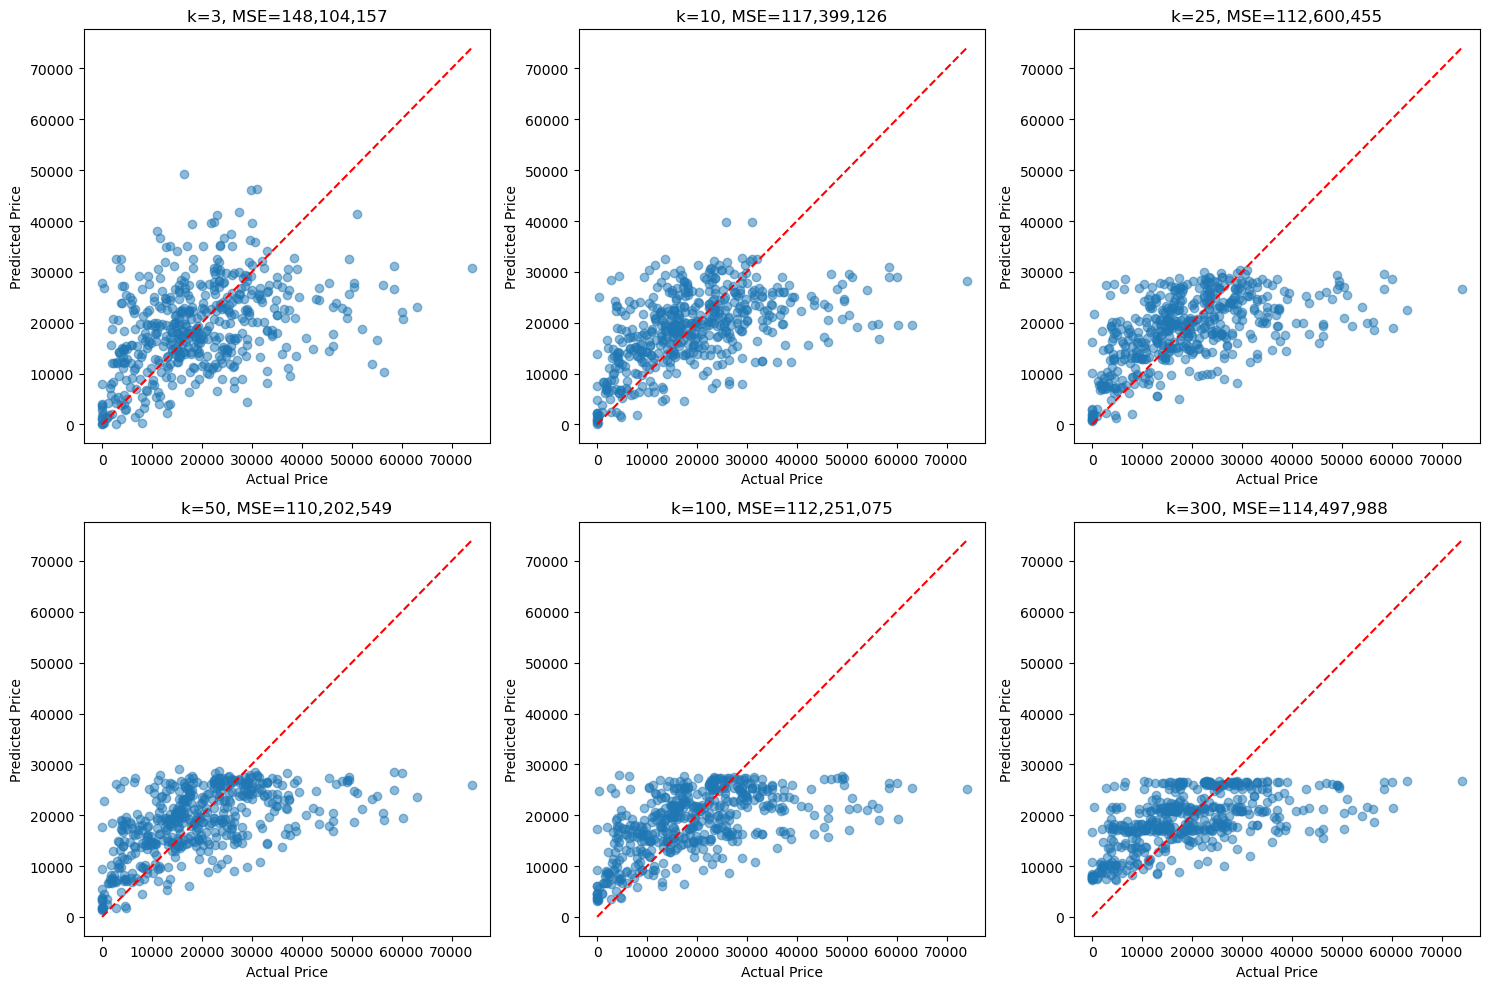

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cars = pd.read_csv('./USA_cars_datasets.csv')
cars = cars[['price', 'year', 'mileage']]
cars.isna().sum()
print(cars.head())
print(cars.shape)

cars['year'] = (cars['year'] - cars['year'].min()) / (cars['year'].max() - cars['year'].min())
cars['mileage'] = (cars['mileage'] - cars['mileage'].min()) / (cars['mileage'].max() - cars['mileage'].min())
print(cars.head())

X = cars[['year', 'mileage']].values
y = cars['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [3, 10, 25, 50, 100, 300]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = np.mean((y_test - y_pred)**2)
    print(f"k={k}: MSE={mse:,.2f}")
    
    axes[idx].scatter(y_test, y_pred, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[idx].set_title(f'k={k}, MSE={mse:,.0f}')
    axes[idx].set_xlabel('Actual Price')
    axes[idx].set_ylabel('Predicted Price')

plt.tight_layout()
plt.show()

MSE decreases from k=3 to k=50, then increases after that. A smaller k shows more scatter while a larger k clusters predictions more toward the mean.

In [30]:
k_range = range(1, 301)
mse_list = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_list.append(np.mean((y_test - y_pred)**2))

optimal_k = k_range[np.argmin(mse_list)]
print(optimal_k)

49


A small k (like k=3) is overfitting because the model is too sensitive to noise, and the predictions vary widely. A large k (like k=300) is underfitting since the model is too smooth, predictions compress toward average. A optimal k balances overfitting and underfitting.

## Q3

In [ ]:
zoo = pd.read_csv('./zoo.csv')
print(zoo.columns.tolist())
zoo['class'].value_counts().sort_index()
feature_cols = [col for col in zoo.columns if col not in ['animal', 'class']]
print(zoo.groupby('class')[['hair', 'feathers', 'milk', 'aquatic', 'airborne', 'legs']].mean())

X = zoo[feature_cols]
y = zoo['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

optimal_k = np.argmax(accuracies) + 1
print("k =",optimal_k)

['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class']
          hair  feathers  milk   aquatic  airborne      legs
class                                                       
1      0.95122       0.0   1.0  0.146341   0.04878  3.365854
2      0.00000       1.0   0.0  0.300000   0.80000  2.000000
3      0.00000       0.0   0.0  0.200000   0.00000  1.600000
4      0.00000       0.0   0.0  1.000000   0.00000  0.000000
5      0.00000       0.0   0.0  1.000000   0.00000  4.000000
6      0.50000       0.0   0.0  0.000000   0.75000  6.000000
7      0.00000       0.0   0.0  0.600000   0.00000  3.700000
k = 1
Predicted   1   2  3  4  5  6  7
Actual                          
1          21   0  0  0  0  0  0
2           0  10  0  0  0  0  0
3           0   0  1  1  0  0  0
4           0   0  0  7  0  0  0
5           0   0  0  0  2  0  0
6           0   0  0  0  0  4

Best predictors: hair, feathers, milk, aquatic, airborne, legs.
For classes: Mammals 41, Birds 20, Reptiles 5, Fish 13, Amphibians 4, Insects 8, Invertebrates 10

Test k=1-20 and select the k with the highest test accuracy.

In [42]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(cm)
print("Accuracy:",np.mean(y_test == y_pred))

Predicted   1   2  3  4  5  6  7
Actual                          
1          21   0  0  0  0  0  0
2           0  10  0  0  0  0  0
3           0   0  1  1  0  0  0
4           0   0  0  7  0  0  0
5           0   0  0  0  2  0  0
6           0   0  0  0  0  4  0
7           0   0  0  0  1  0  4
Accuracy: 0.9607843137254902


Has high accuracy of about 96%. Mistakes occur between classes that share similar feature values. k-NN struggles when taking examples from different classes that are close with overlapping characteristics.

In [41]:
X_red = zoo[['milk', 'aquatic', 'airborne']]
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y, test_size=0.5, random_state=42, stratify=y)
knn_red = KNeighborsClassifier(n_neighbors=3)
knn_red.fit(X_train_red, y_train_red)
y_pred_red = knn_red.predict(X_test_red)
cm_red = pd.crosstab(y_test_red, y_pred_red, rownames=['Actual'], colnames=['Predicted'])
print(cm_red)

Predicted   1  2  4
Actual             
1          19  2  0
2           0  9  1
3           0  1  1
4           0  0  7
5           0  0  2
6           0  4  0
7           0  1  4


Only 3 binary features create limited combinations. This model cannot distinguish all 7 classes. Probabilities show all classes but predictions collapse to distinguishable ones.

## Q4

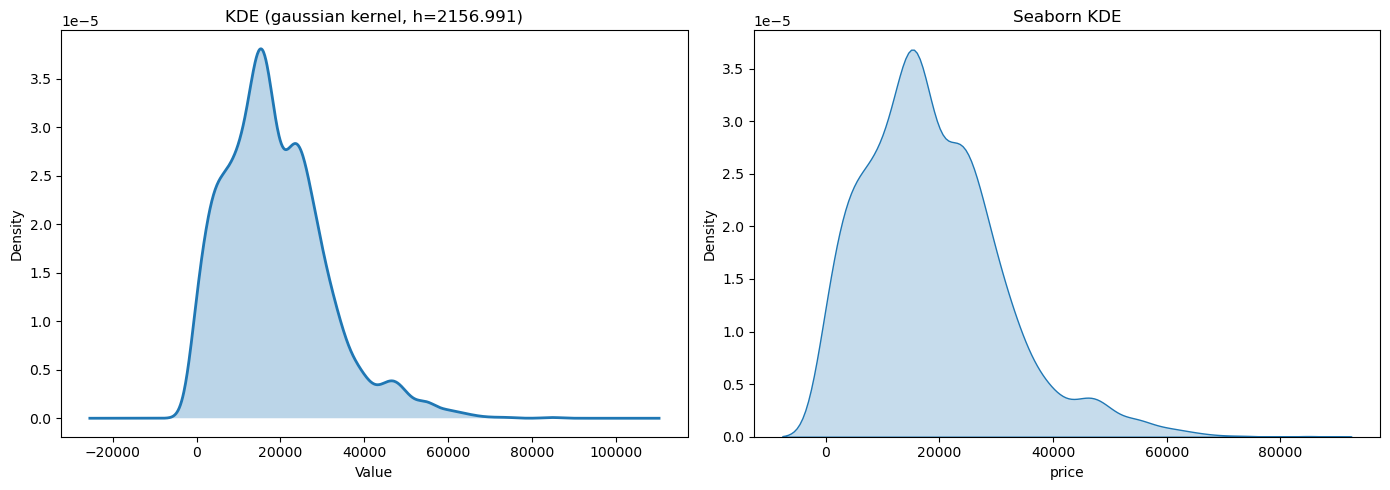

In [44]:
def kde_plot(data, kernel='gaussian', bandwidth=None, grid_points=1000, ax=None):
    if isinstance(data, pd.Series):
        x = data.dropna().values
    else:
        x = np.array(data)
        x = x[~np.isnan(x)]
    
    n = len(x)
    
    if bandwidth is None:
        std = np.std(x)
        iqr = np.percentile(x, 75) - np.percentile(x, 25)
        bandwidth = 0.9 * min(std, iqr / 1.34) * (n ** (-1/5))
    
    x_min, x_max = x.min(), x.max()
    x_range = x_max - x_min
    x_grid = np.linspace(x_min - 0.3 * x_range, x_max + 0.3 * x_range, grid_points)
    
    if kernel == 'gaussian':
        def K(u):
            return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)
    elif kernel == 'uniform':
        def K(u):
            return 0.5 * (np.abs(u) <= 1)
    elif kernel == 'epanechnikov':
        def K(u):
            return 0.75 * (1 - u**2) * (np.abs(u) <= 1)
    
    density = np.zeros(grid_points)
    for i, x_val in enumerate(x_grid):
        u = (x_val - x) / bandwidth
        density[i] = np.sum(K(u)) / (n * bandwidth)
    
    # Plot
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(x_grid, density, linewidth=2)
    ax.fill_between(x_grid, density, alpha=0.3)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'KDE ({kernel} kernel, h={bandwidth:.3f})')
    
    return ax

# Test with car price data
df = pd.read_csv('./USA_cars_datasets.csv')
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

kde_plot(df['price'], kernel='gaussian', ax=axes[0])

sns.kdeplot(data=df['price'], ax=axes[1], fill=True)
axes[1].set_title('Seaborn KDE')

plt.tight_layout()
plt.show()